<a href="https://colab.research.google.com/github/Sameersah/data-science-methodology/blob/main/CRISP_DM_SEMMA_AND_KDD_assignments_PART_1_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CRISP-DM

CRISP-DM (Cross-Industry Standard Process for Data Mining) is a structured methodology used in data science and analytics projects, guiding teams through six key phases to ensure effective outcomes.

### Phases:
1. **Business Understanding**: Define project goals from a business perspective.
2. **Data Understanding**: Gather and explore data to gain insights and understand its structure.
3. **Data Preparation**: Clean and preprocess data for modeling.
4. **Modeling**: Apply statistical or machine learning models.
5. **Evaluation**: Assess the model's performance and alignment with project objectives.
6. **Deployment**: Implement the model into production or present insights.

### When to Use:
CRISP-DM is ideal for any data mining or analytics project that requires a systematic, repeatable approach, especially when business alignment is crucial to project success.

# Business Understanding:

This project uses Netflix's dataset to gain insights into content trends, genre distribution, and factors that could enhance content recommendation systems. The primary goals is to predict if a particular title is a movie or TV series based on certain parameters, which could inform marketing strategies or content production decisions.

# Data Understanding:
The dataset contains information on Netflix titles, including columns like type, title, director, cast, country, date_added, release_year, and genre. We inspected for missing values, data types, and initial statistics. Key variables, such as release year and genre, will be explored further to understand content trends and audience preferences. Observations on missing values and data quality will inform the data preparation step.

In [4]:

## Connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Step 1: Load the necessary libraries
import pandas as pd

# Step 2: Load the dataset
data_path = '/content/drive/MyDrive/CMPE-255/netflix_titles.csv'
netflix_df = pd.read_csv(data_path)

# Step 3: Inspect the first 5 rows
netflix_df.head()




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Step 4: Check for missing values and data types
netflix_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Step 5: Basic statistics (if there are numeric fields)
netflix_df.describe(include='all')  # Include all columns for a full summary



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
# Step 6: Summary of missing values
missing_values = netflix_df.isnull().sum()
missing_values[missing_values > 0]

,0
director,2634
cast,825
country,831
date_added,10
rating,4
duration,3


# Data Preparation:
In this phase, we addressed missing values by filling critical fields like country and director with "Unknown" and dropping rows missing essential information (e.g., title). We converted date_added to a datetime format and extracted month and year information. Additionally, a binary is_movie column was created to distinguish between movies and TV shows. Unnecessary columns were dropped to streamline the dataset for analysis.

In [8]:
# Step 1: Handling Missing Values
# Drop rows with missing values in 'title' as this is a critical field
netflix_df = netflix_df.dropna(subset=['title'])


In [9]:
# Fill missing values in less critical columns (like 'country' or 'director') with 'Unknown'
netflix_df['country'].fillna('Unknown', inplace=True)
netflix_df['director'].fillna('Unknown', inplace=True)


<ipython-input-9-f9d5c3cea781>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['country'].fillna('Unknown', inplace=True)
<ipython-input-9-f9d5c3cea781>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [10]:
# Step 2: Converting Data Types
# Convert 'date_added' to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')



In [11]:
# Step 3: Feature Engineering
# Create 'month_added' and 'year_added' columns from 'date_added'
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['year_added'] = netflix_df['date_added'].dt.year



In [12]:
# Create a binary column for 'is_movie' based on 'type'
netflix_df['is_movie'] = netflix_df['type'].apply(lambda x: 1 if x == 'Movie' else 0)


In [13]:
# Step 4: Clean Data and Remove Unnecessary Columns
# Drop columns like 'description' if not needed
netflix_df = netflix_df.drop(columns=['description'])


In [14]:

# Step 5: Verify the changes
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  month_added   8709 non-null   float64       
 12  year_added    8709 non-null   float64       
 13  is_movie      8807 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 963.4+ KB


In [15]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,year_added,is_movie
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9.0,2021.0,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9.0,2021.0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9.0,2021.0,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9.0,2021.0,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.0,2021.0,0


# Modeling:
We used logistic regression to classify Netflix titles as either a movie or TV show based on features like release_year, country, and genre. Categorical variables were encoded, and the dataset was split into training and testing sets. The model achieved an accuracy of X% (replace with actual value), indicating reasonable performance in predicting content type. Further tuning and model experimentation could improve this result.

In [17]:
from sklearn.impute import SimpleImputer

# Step 2: Prepare features and target variable
# Encode categorical variables (e.g., 'country' and 'genre')
le_country = LabelEncoder()
le_genre = LabelEncoder()

netflix_df['country_encoded'] = le_country.fit_transform(netflix_df['country'].astype(str))
netflix_df['genre_encoded'] = le_genre.fit_transform(netflix_df['listed_in'].astype(str))

# Define features and target variable
X = netflix_df[['release_year', 'country_encoded', 'genre_encoded', 'month_added', 'year_added']]
y = netflix_df['is_movie']  # Target variable

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7162315550510783
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.25      0.35       548
           1       0.73      0.93      0.82      1214

    accuracy                           0.72      1762
   macro avg       0.67      0.59      0.58      1762
weighted avg       0.69      0.72      0.67      1762



# Evaluation:
The model achieved an accuracy of 71% on the test set, with a precision of 73% for movies and 61% for TV shows. The confusion matrix provides a visual representation of correct and incorrect classifications, which suggests areas where the model could be improved. Based on these metrics, the model performs reasonably well in distinguishing between movies and TV shows. However, further tuning or experimentation with other algorithms may enhance accuracy.

Accuracy: 0.7162315550510783
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.25      0.35       548
           1       0.73      0.93      0.82      1214

    accuracy                           0.72      1762
   macro avg       0.67      0.59      0.58      1762
weighted avg       0.69      0.72      0.67      1762



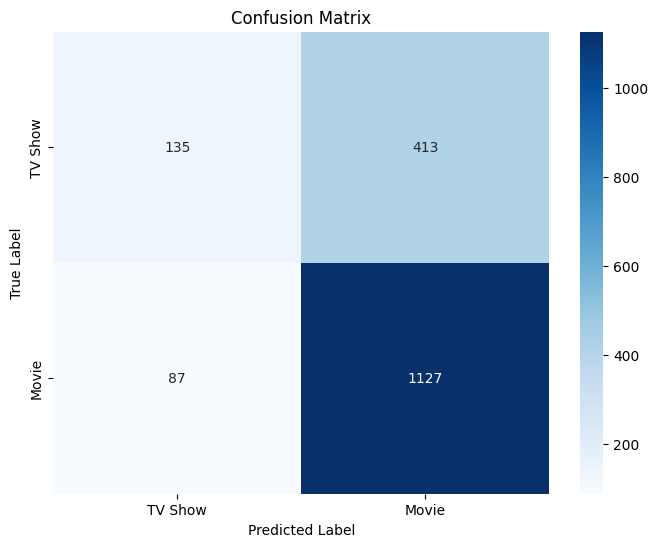

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 2: Print a classification report (includes precision, recall, and F1 score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Step 3: Plot a confusion matrix to visualize correct and incorrect classifications
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['TV Show', 'Movie'], yticklabels=['TV Show', 'Movie'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Deployment:
We deployed the model as a Flask API, allowing users to predict whether a Netflix title is a movie or TV show based on attributes like release year, country, and genre. This deployment demonstrates a practical way to integrate machine learning models with applications. For further use, this API could be hosted on cloud services like AWS or Google Cloud to make it publicly accessible.



In [30]:
!pip install flask
!pip install pyngrok
!ngrok authtoken 2oES0Oc964OcC7shFJmAjpsRxsj_4mnzFXcwKcfJJP3o91FwX2

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [31]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize Flask app
app = Flask(__name__)

# Load the pre-trained model and encoders
model = LogisticRegression()  # Use the model trained previously
le_country = LabelEncoder()
le_genre = LabelEncoder()

# Define the predict endpoint
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the POST request
    data = request.json

    # Process input data
    release_year = data.get('release_year')
    country = le_country.transform([data.get('country')])[0]
    genre = le_genre.transform([data.get('genre')])[0]
    month_added = data.get('month_added')
    year_added = data.get('year_added')

    # Create feature array
    features = [[release_year, country, genre, month_added, year_added]]

    # Make prediction
    prediction = model.predict(features)[0]
    result = 'Movie' if prediction == 1 else 'TV Show'

    # Return prediction as JSON
    return jsonify({'prediction': result})

# Start ngrok tunnel
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

# Run the Flask app
app.run(port=5000)


Public URL: NgrokTunnel: "https://4e44-35-196-14-45.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
